In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cancer_data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
df.drop(labels=['id','Unnamed: 32'],axis=1,inplace=True)

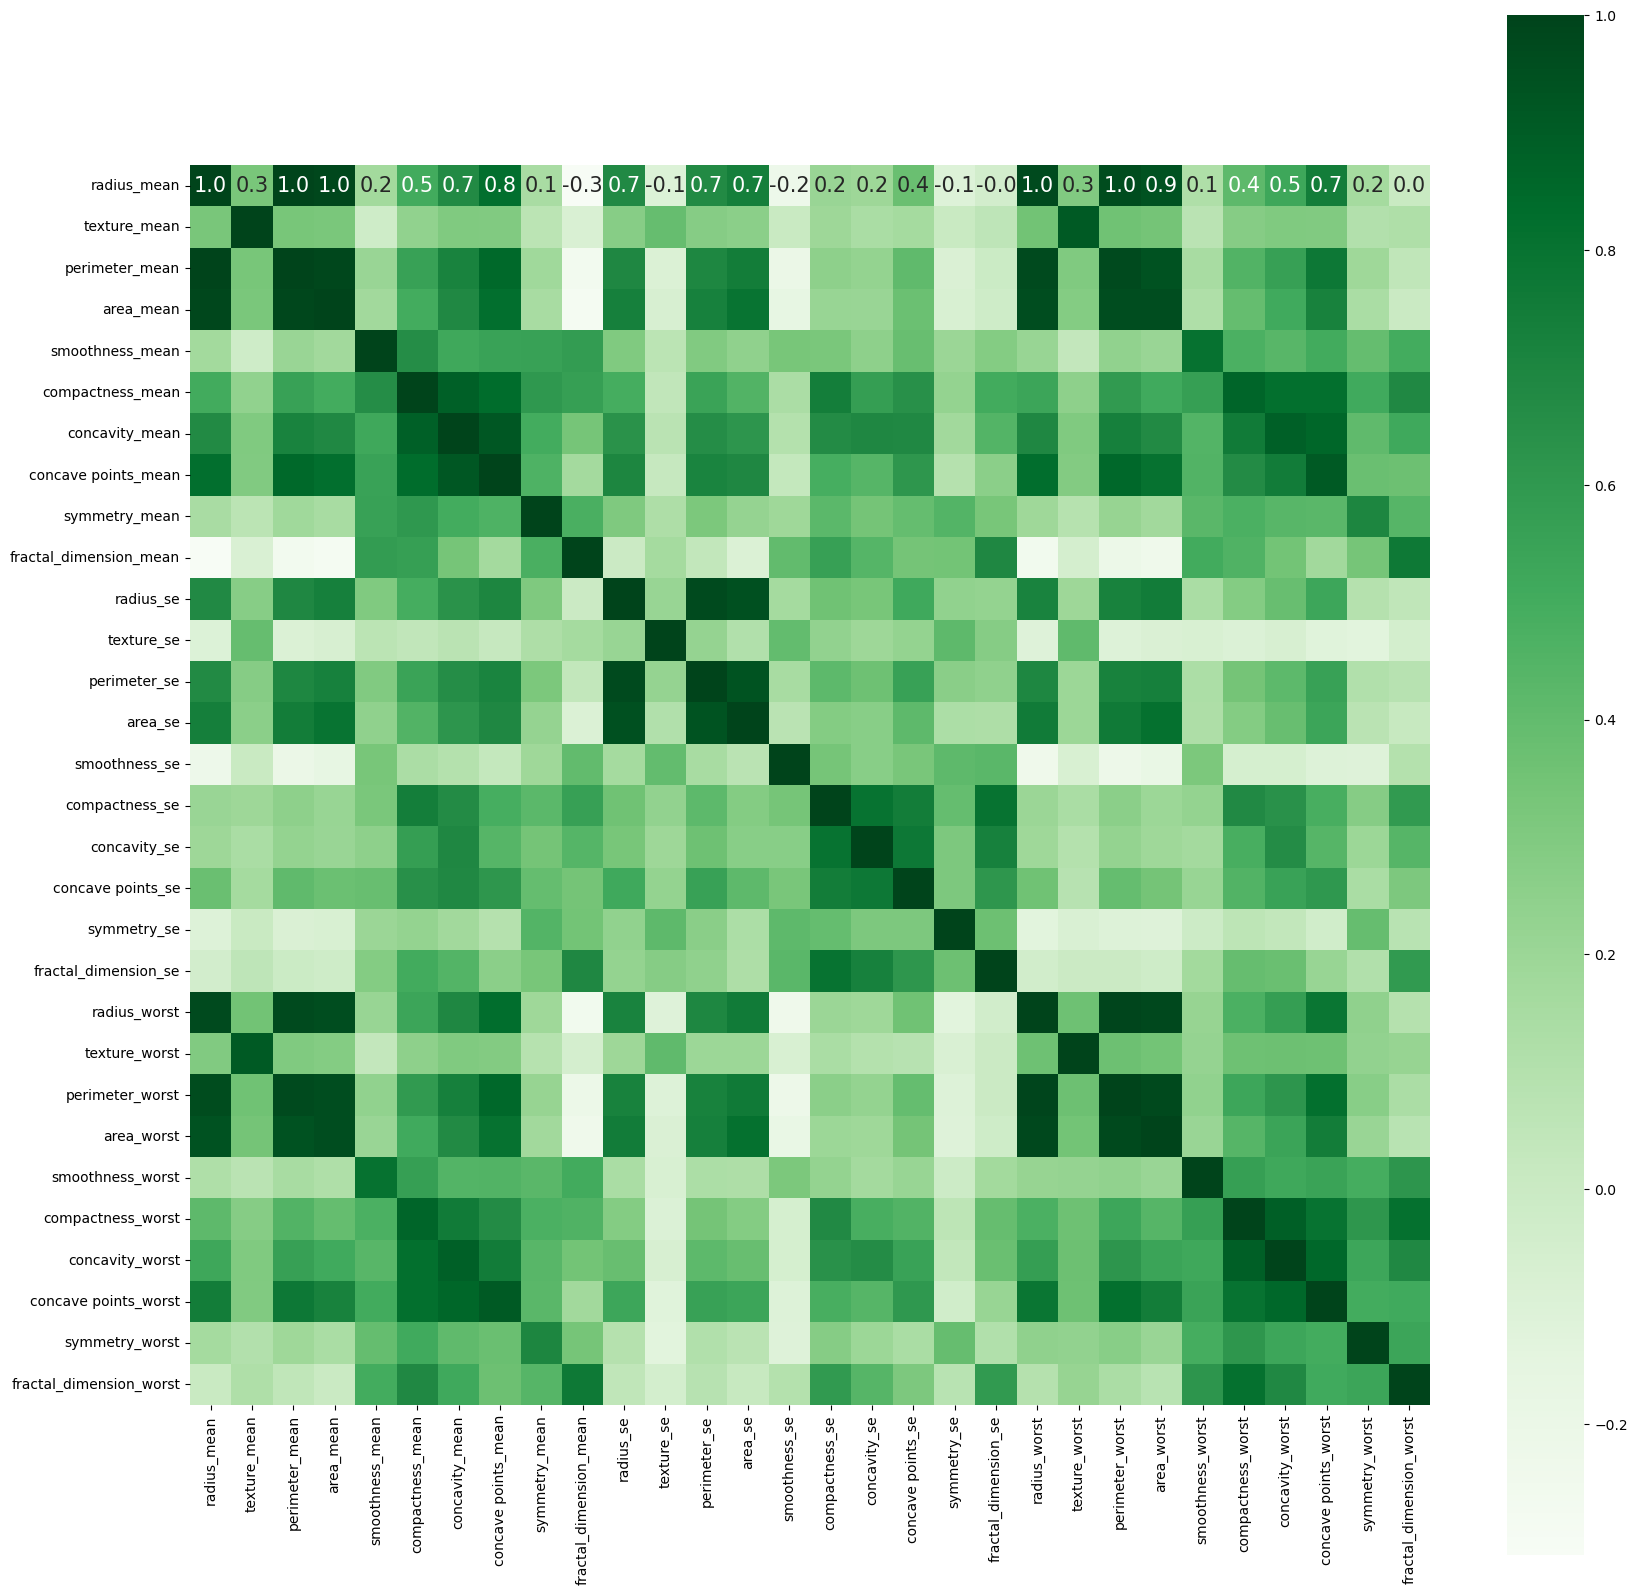

In [10]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()


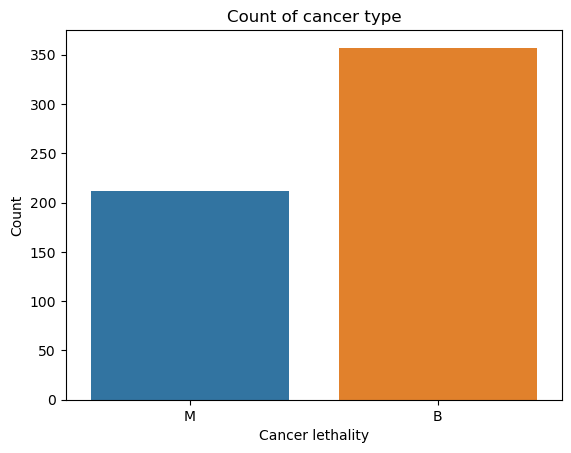

In [13]:
plt.title('Count of cancer type')
sns.countplot(df,x='diagnosis')
plt.xlabel('Cancer lethality')
plt.ylabel('Count')
plt.show()

In [14]:
X= df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_test,y_pred) * 100,2)
print(acc_logreg)

93.86


### NaiveBayes

In [24]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred = nb_model.predict(X_test)

In [27]:
acc_nb = round(accuracy_score(y_test,y_pred) * 100,2)
print(acc_nb)

92.11


### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [29]:
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
}


In [31]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(clf,parameters)
grid_model.fit(X_train,y_train)

C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10, 50],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 10],
                         'min_samples_split': [2, 3, 50, 100]})

In [34]:
print(grid_model.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [38]:
clf = DecisionTreeClassifier(criterion='entropy', 
max_depth= 5, 
max_features= 'auto', 
min_samples_leaf= 1, 
min_samples_split= 2)

In [39]:
clf.fit(X_train,y_train)

C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto')

In [41]:
y_pred = clf.predict(X_test)

In [42]:
acc_tree = round(accuracy_score(y_test,y_pred) * 100,2)
print(acc_tree)

90.35


In [43]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

grid_model = GridSearchCV(rf,parameters)
grid_model.fit(X_train,y_train)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\piyush.athawale\AppData\Local\Temp\ipykernel_19536\3984895615.py", line 16, in <module>
    grid_model.fit(X_train,y_train)
  File "C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py", line 821, in evaluate_candidates
    out = parallel(
          ^^^^^^^^^
  File "C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\sklearn\util

In [ ]:
print(grid_model.best_params_)

### SVM

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [45]:
from sklearn import svm

svc = svm.SVC()

parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

grid_model = GridSearchCV(svc,parameters)
grid_model.fit(X_train,y_train)



GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [46]:
grid_model.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [47]:
svc_model = svm.SVC(C=1000, gamma= 0.001, kernel= 'rbf')
svc_model.fit(X_train,y_train)

SVC(C=1000, gamma=0.001)

In [48]:
y_pred = svc_model.predict(X_test)
acc_svc = round(accuracy_score(y_test,y_pred) * 100,2)
print(acc_svc)

94.74


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }
grid_model = GridSearchCV(knn,parameters)
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 50],
                         'n_neighbors': [3, 4, 5, 10],
                         'weights': ['uniform', 'distance']})

In [51]:
knn_model = grid_model.best_estimator_
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
acc_knn = round(accuracy_score(y_test,y_pred) * 100,2)
print(acc_knn)

96.49
